# Unit 5 - Financial Planning


In [3]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

import json

%matplotlib inline

In [4]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [5]:
# Set current amount of crypto assets
# YOUR CODE HERE!

my_btc= 1.2 
my_eth= 5.3

In [6]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [7]:
# Fetch current BTC price

request_url_btc= btc_url 

# Fetch current ETH price

request_url_eth= eth_url

In [8]:
my_btc_request=requests.get(request_url_btc).json()
print(json.dumps(my_btc_request,indent=4))

{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 18606487,
            "total_supply": 18606487,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 31332.0,
                    "volume_24h": 64019757958,
                    "market_cap": 586024906969,
                    "percentage_change_1h": -0.951335513153153,
                    "percentage_change_24h": -6.84961182678568,
                    "percentage_change_7d": -16.350080004733,
                    "percent_change_1h": -0.951335513153153,
                    "percent_change_24h": -6.84961182678568,
                    "percent_change_7d": -16.350080004733
                },
                "CAD": {
                    "price": 39525.318,
                    "volume_24h": 80760924664.017,
                    "

In [9]:
my_eth_request=requests.get(request_url_eth).json()
print(json.dumps(my_eth_request, indent=4))

{
    "data": {
        "1027": {
            "id": 1027,
            "name": "Ethereum",
            "symbol": "ETH",
            "website_slug": "ethereum",
            "rank": 2,
            "circulating_supply": 114344709,
            "total_supply": 114344709,
            "max_supply": 0,
            "quotes": {
                "USD": {
                    "price": 1198.88,
                    "volume_24h": 49004048868,
                    "market_cap": 137085372993,
                    "percentage_change_1h": -0.329660271329197,
                    "percentage_change_24h": -5.70925543492099,
                    "percentage_change_7d": 5.90650451953459,
                    "percent_change_1h": -0.329660271329197,
                    "percent_change_24h": -5.70925543492099,
                    "percent_change_7d": 5.90650451953459
                },
                "CAD": {
                    "price": 1512.38712,
                    "volume_24h": 61818607646.982,
                 

In [10]:
my_btc_price= my_btc_request["data"]["1"]["quotes"]["USD"]["price"]
print(my_btc_price)
my_eth_price= my_eth_request["data"]["1027"]["quotes"]["USD"]["price"]
print(my_eth_price)


31332.0
1198.88


In [11]:
# Compute current value of my crpto

my_btc_value= my_btc*my_btc_price
my_eth_value= my_eth*my_eth_price
total_crypto_value= my_btc_value+my_eth_value

In [12]:
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $37598.40
The current value of your 5.3 ETH is $6354.06


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [13]:
# Current amount of shares

my_agg=200
my_spy= 50

In [16]:
# Set Alpaca API key and secret

api_key= os.getenv("ALPACA_API_KEY")
secret_key= os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object

alpaca=tradeapi.REST(
    api_key,
    secret_key,
    api_version="v2"
    )

In [17]:
# Format current date as ISO format
today= pd.Timestamp("2021-01-13", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

In [18]:
# Get current closing prices for SPY and AGG

port_df= alpaca.get_barset(
    tickers,
    timeframe,
    start=today,
    end=today
).df


# Preview DataFrame

port_df.head()

AGG                                      SPY  \
                             open    high     low   close   volume    open   
time                                                                         
2021-01-13 00:00:00-05:00  117.63  117.63  117.08  117.36  5686592  378.69   

                                                             
                             high     low   close    volume  
time                                                         
2021-01-13 00:00:00-05:00  380.86  377.85  379.76  38355050

In [19]:
# Pick AGG and SPY close prices
# YOUR CODE HERE!

port_closing_price= pd.DataFrame()

port_closing_price["AGG"]= port_df["AGG"]["close"]
port_closing_price["SPY"]= port_df["SPY"]["close"]
port_closing_price.head()


,AGG,SPY
time,,
2021-01-13 00:00:00-05:00,117.36,379.76


In [20]:
port_closing_price.index= port_closing_price.index.date
port_closing_price

,AGG,SPY
2021-01-13,117.36,379.76


In [21]:
# Print AGG and SPY close prices

agg_closing_price = port_closing_price.AGG.item()
spy_closing_price = port_closing_price['SPY'].item()
print(f"Current AGG closing price: ${agg_closing_price}")
print(f"Current AGG closing price: ${spy_closing_price}")

Current AGG closing price: $117.36
Current AGG closing price: $379.76


In [22]:
# Compute the current value of shares

my_spy_value=my_spy*spy_closing_price
my_agg_value=my_agg*agg_closing_price
total_shares_value= my_spy_value+my_agg_value

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $18988.00
The current value of your 200 AGG shares is $23472.00


### Savings Health Analysis

In [23]:
# Set monthly household income
monthly_income= 12000

# Create savings DataFrame

df_savings = pd.DataFrame( columns = ["Amount"], index=["Crypto", "Shares"])

df_savings["Amount"]["Crypto"]= total_crypto_value
df_savings["Amount"]["Shares"]= total_shares_value


# Display savings DataFrame

df_savings

,Amount
Crypto,43952.5
Shares,42460


<AxesSubplot:title={'center':'Composition of Personal Saving'}, ylabel='Amount'>

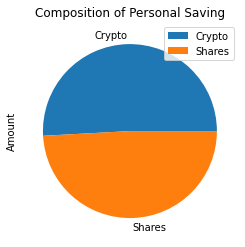

In [20]:
# Plot savings pie chart

df_savings.plot.pie(y="Amount", title="Composition of Personal Saving")

In [24]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings

total_saving= total_crypto_value+total_shares_value

# Validate saving health

if total_saving >= emergency_fund:
    print(f"You have enough emergency fund.")
else:
    print(f"You don't have enough saving to cover your emergency fund.")

You have enough emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [26]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-01-15', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-01-15', tz='America/New_York').isoformat()

In [28]:
# Get 5 years' worth of historical data for SPY and AGG

df_stock_data= alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df



# Display sample data
df_stock_data.head()

AGG                                       \
                             open      high       low   close   volume   
time                                                                     
2016-01-15 00:00:00-05:00  109.08  109.1200  108.8300  108.94  3049283   
2016-01-19 00:00:00-05:00  108.85  108.9600  108.7215  108.81  3956197   
2016-01-20 00:00:00-05:00  109.10  109.1825  108.8713  108.92  4008040   
2016-01-21 00:00:00-05:00  109.08  109.0800  108.7400  108.78  6927926   
2016-01-22 00:00:00-05:00  108.72  108.8500  108.5850  108.82  2980878   

                              SPY                                     
                             open    high     low   close     volume  
time                                                                  
2016-01-15 00:00:00-05:00  186.77  188.76  185.52  187.78  240958526  
2016-01-19 00:00:00-05:00  189.96  190.11  186.20  188.02  151482568  
2016-01-20 00:00:00-05:00  185.03  188.06  181.02  185.79  245668486  
2016-01-21 00:00:00-05:00  186.21  188.87  184.64  186.68  154918462  
2016-01-22 00:00:00-05:00  189.78  190.76  188.88  190.49  132418951

In [29]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!

MC_30years = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [30]:
# Printing the simulation input data

MC_30years.portfolio_data.tail()

AGG                                   \
                             open    high     low   close   volume   
time                                                                 
2021-01-11 00:00:00-05:00  117.02  117.05  116.89  116.89  5047096   
2021-01-12 00:00:00-05:00  116.82  116.99  116.68  116.98  5103382   
2021-01-13 00:00:00-05:00  117.63  117.63  117.08  117.36  5686592   
2021-01-14 00:00:00-05:00  117.37  117.45  117.08  117.15  5311077   
2021-01-15 00:00:00-05:00  117.34  117.36  117.18  117.26  4776104   

                                           SPY                            \
                          daily_return    open    high       low   close   
time                                                                       
2021-01-11 00:00:00-05:00    -0.001708  377.85  380.58  377.7189  378.74   
2021-01-12 00:00:00-05:00     0.000770  378.89  379.86  376.3600  378.81   
2021-01-13 00:00:00-05:00     0.003248  378.69  380.86  377.8500  379.76   
2021-01-14 00:00:00-05:00    -0.001789  380.59  381.13  378.1000  378.45   
2021-01-15 00:00:00-05:00     0.000939  376.72  377.58  373.7000  375.68   

                                                  
                             volume daily_return  
time                                              
2021-01-11 00:00:00-05:00  44814805    -0.006558  
2021-01-12 00:00:00-05:00  45364896     0.000185  
2021-01-13 00:00:00-05:00  38355050     0.002508  
2021-01-14 00:00:00-05:00  41045335    -0.003450  
2021-01-15 00:00:00-05:00  78405054    -0.007319

In [31]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns

MC_30years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.995860,1.016424,1.000220,0.999035,1.004005,0.992950,1.017732,1.003082,0.995107,0.995118,...,0.993363,0.995802,1.003386,1.002456,0.996021,0.989749,0.991572,1.002868,1.004736,1.001716
2,1.001825,1.018937,1.010142,0.998848,0.993795,0.989966,1.030012,1.010804,0.994025,0.989508,...,0.990044,0.999040,1.005085,0.983412,0.998890,1.004651,0.994359,0.994267,0.993070,0.997372
3,1.014991,1.030018,1.010281,1.014944,0.988810,0.995554,1.032565,0.995723,0.986190,0.985984,...,0.982885,0.983839,1.008012,0.979366,0.989040,1.009108,0.994570,0.991134,0.999375,1.013860
4,1.020455,1.024069,1.017986,1.020250,0.995837,1.006080,1.039981,0.998117,0.984675,0.991539,...,0.982025,0.986365,1.024882,0.976637,1.005504,1.007581,0.995597,0.986598,0.998988,1.016864
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,7.459930,65.996125,29.503625,11.698145,17.867603,9.249935,8.770584,6.340445,13.137977,10.811832,...,12.958866,10.069751,26.689621,33.480746,31.642141,7.954773,10.409419,13.059506,13.569636,28.088236
7557,7.514209,66.561621,29.504697,11.653755,18.021634,9.297447,8.714850,6.337587,13.249571,10.779521,...,12.862654,9.962739,26.945691,33.764071,31.446103,8.041593,10.305063,12.990764,13.516786,28.144057
7558,7.467497,66.554927,29.399644,11.642227,18.157419,9.322653,8.604404,6.369882,13.289339,10.794395,...,12.840140,9.951395,26.974209,33.749863,31.137481,7.966965,10.292358,12.954730,13.519799,28.119211
7559,7.544646,65.680533,29.333039,11.913400,18.018508,9.318945,8.547530,6.351086,13.365175,10.812835,...,12.890784,10.069155,26.775188,34.031380,31.135025,8.035715,10.317867,12.951338,13.419412,27.864825


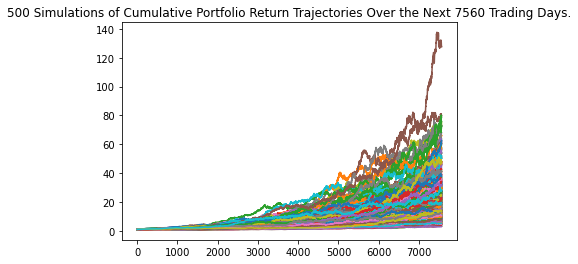

In [33]:
# Plot simulation outcomes

line_plot = MC_30years.plot_simulation()


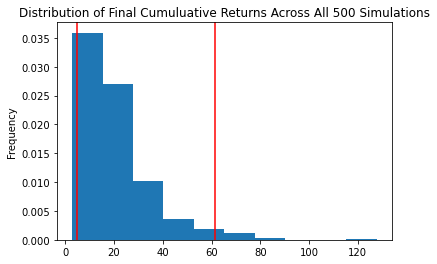

In [34]:
# Plot probability distribution and confidence intervals

dist_plot = MC_30years.plot_distribution()


### Retirement Analysis

In [35]:
# Fetch summary statistics from the Monte Carlo simulation results


simulated_returns_data30 = {
    "mean": list(MC_30years.simulated_return.mean(axis=1)),
    "median": list(MC_30years.simulated_return.median(axis=1)),
    "min": list(MC_30years.simulated_return.min(axis=1)),
    "max": list(MC_30years.simulated_return.max(axis=1))

}

# Print summary statistics

df_simulated_returns30 = pd.DataFrame(simulated_returns_data30)
df_simulated_returns30.head()

,mean,median,min,max
0,1.000000,1.000000,1.000000,1.000000
1,1.000206,1.000662,0.979382,1.021284
2,1.001128,1.001281,0.960625,1.032732
3,1.001280,1.001552,0.961318,1.035288
4,1.001659,1.001500,0.958206,1.045699


In [38]:
tbl = MC_30years.summarize_cumulative_return()
tbl

count           500.000000
mean             20.558652
std              14.737659
min               2.873644
25%              10.341016
50%              16.368545
75%              25.989189
max             127.658802
95% CI Lower      5.007673
95% CI Upper     61.403836
Name: 7560, dtype: float64

### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [41]:
# Set initial investment
initial_investment_20k = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000

ci_lower_30 = round(tbl[8]*initial_investment_20k,2)
ci_upper_30 = round(tbl[9]*initial_investment_20k,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_20k} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower_30} and ${ci_upper_30}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $100153.47 and $1228076.73


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [42]:
# Set initial investment
initial_investment_30k = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000

ci_lower_30 = round(tbl[8]*initial_investment_30k,2)
ci_upper_30 = round(tbl[9]*initial_investment_30k,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_30k} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower_30} and ${ci_upper_30}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $150230.2 and $1842115.09


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [43]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5years = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [44]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns

MC_5years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.004656,0.999120,0.996941,0.999204,0.989476,1.009218,0.996805,1.011787,1.005038,1.010879,...,0.993357,0.989744,0.996025,0.990382,0.999742,0.997942,1.001986,1.005995,0.997141,0.990821
2,1.015627,1.003213,0.989212,1.013186,0.995585,1.011417,1.002139,1.009215,1.019200,1.021422,...,0.981321,1.010116,1.002978,0.999251,0.989483,0.992635,0.996745,1.007232,0.992320,0.990514
3,1.006767,1.005030,0.993752,1.011849,0.994780,1.011522,0.992395,1.015063,1.017930,1.025358,...,0.975480,1.003527,1.010820,0.988718,0.999054,0.996697,1.002747,1.014468,0.991220,0.997582
4,1.003198,0.998885,0.991229,1.016804,0.989841,1.019881,0.992845,1.011974,1.024384,1.033532,...,0.976743,1.000987,1.024195,0.984611,1.008292,0.993772,1.006072,1.015656,0.997491,0.981012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.701743,1.247723,1.003717,2.967901,1.514000,1.241358,1.814556,2.304454,1.719665,1.410900,...,1.699658,1.154879,1.381476,1.560985,1.794760,1.640932,1.549674,1.439771,1.281051,1.864514
1257,1.675496,1.237858,1.000640,2.982521,1.530994,1.239133,1.819832,2.286898,1.730648,1.413440,...,1.700851,1.152370,1.397970,1.550265,1.821712,1.643962,1.550832,1.435260,1.276484,1.856171
1258,1.677798,1.238103,0.980872,2.963138,1.536944,1.258651,1.817811,2.310904,1.719076,1.414320,...,1.685806,1.153510,1.400527,1.561766,1.818674,1.658803,1.553333,1.430193,1.285004,1.824189
1259,1.668279,1.244265,0.975837,2.973752,1.536156,1.266702,1.819007,2.310521,1.695282,1.409679,...,1.678379,1.157251,1.413436,1.565492,1.810686,1.661615,1.568801,1.421653,1.276991,1.800158


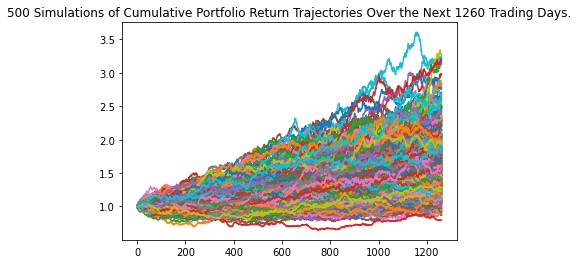

In [45]:
# Plot simulation outcomes


line_plot = MC_5years.plot_simulation()

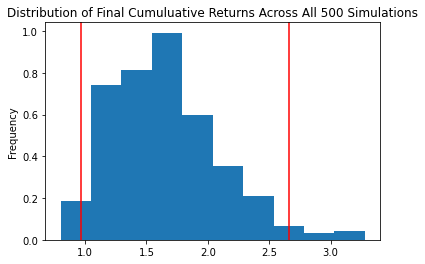

In [46]:
# Plot probability distribution and confidence intervals

dist_plot = MC_5years.plot_distribution()

In [47]:
# Fetch summary statistics from the Monte Carlo simulation results

tbl_5 = MC_5years.summarize_cumulative_return()


# Print summary statistics
tbl_5

count           500.000000
mean              1.651375
std               0.440410
min               0.799666
25%               1.317162
50%               1.608179
75%               1.880742
max               3.278932
95% CI Lower      0.970493
95% CI Upper      2.660884
Name: 1260, dtype: float64

In [49]:
# Set initial investment

initial_investment_60k= 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000

ci_lower_5 = round(tbl_5[8]*initial_investment_60k,2)
ci_upper_5 = round(tbl_5[9]*initial_investment_60k,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_60k} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_5} and ${ci_upper_5}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $58229.56 and $159653.05


### Ten Years Retirement Option

In [50]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns


MC_10years = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [51]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns

MC_10years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.009147,0.999745,1.018807,1.011199,0.997369,0.999240,0.988172,0.995154,0.993879,0.996806,...,0.997582,1.004369,0.994626,0.992157,1.002532,1.011251,0.996525,1.007034,0.994093,1.001779
2,1.007834,1.009111,1.001834,1.007793,1.007111,0.994167,0.996496,0.993670,0.987366,1.002708,...,0.994051,1.002893,0.993440,0.986778,1.001534,1.017451,0.988787,1.006923,0.990278,1.001160
3,1.009027,1.009881,1.006700,1.012890,1.009187,0.985095,0.994647,1.006230,0.985466,1.005014,...,1.001277,0.999433,0.998657,0.991739,0.987434,1.015917,0.984103,1.008309,0.997885,1.016219
4,1.007701,1.009602,1.008798,1.008174,1.018001,0.985281,0.994735,0.995923,0.974731,1.006946,...,0.997564,0.999214,1.005398,0.980457,0.987422,1.014422,0.980238,1.002287,0.996726,1.024497
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.236217,2.925047,3.935425,5.485207,2.671691,6.530762,1.449452,2.924595,3.042308,3.741487,...,1.312131,1.744635,3.203078,1.978137,2.385861,3.173752,2.700636,1.707324,3.020371,3.032664
2517,2.239083,2.933353,3.902818,5.427777,2.679891,6.526867,1.450420,2.975988,3.049393,3.743129,...,1.321354,1.759708,3.200309,2.022457,2.381612,3.194683,2.703595,1.707261,3.011604,3.015588
2518,2.243819,2.940885,3.940974,5.451256,2.663772,6.538817,1.463197,2.986054,3.053618,3.758759,...,1.331733,1.755198,3.232878,2.052168,2.363908,3.157658,2.708007,1.694151,3.032564,3.022387
2519,2.258811,2.918219,3.964641,5.414074,2.625239,6.545500,1.441232,3.014504,3.034028,3.786813,...,1.327753,1.743648,3.223842,2.061207,2.364208,3.146643,2.686740,1.706637,3.012171,2.988498


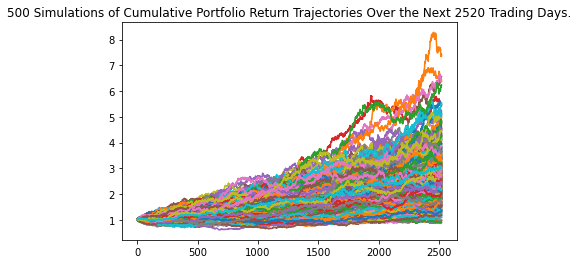

In [52]:
# Plot simulation outcomes

line_plot = MC_10years.plot_simulation()

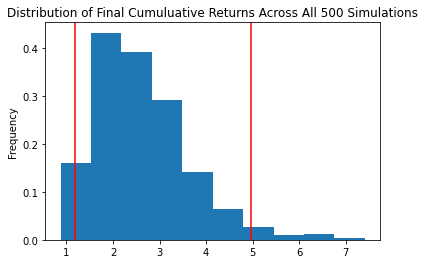

In [56]:
# Plot probability distribution and confidence intervals

dist_plot_10 = MC_10years.plot_distribution()

In [57]:
# Fetch summary statistics from the Monte Carlo simulation results

tbl_10 = MC_10years.summarize_cumulative_return()
tbl_10

count           500.000000
mean              2.624817
std               0.995074
min               0.871923
25%               1.913748
50%               2.491366
75%               3.161039
max               7.411911
95% CI Lower      1.177730
95% CI Upper      4.966629
Name: 2520, dtype: float64

In [60]:
# Set initial investment

initial_investment_60k= 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000

ci_lower_10 = round(tbl[8]*initial_investment_60k,2)
ci_upper_10 = round(tbl[9]*initial_investment_60k,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_60k} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_10} and ${ci_upper_10}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $300460.4 and $3684230.18
